## Imports

In [1]:
#import all libraies that i might use for this project.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline


%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [2]:
#importing the files to udnerstand the data
df_train= pd.read_csv('./datasets/train.csv')
df_test= pd.read_csv('./datasets/test.csv')
df_sample= pd.read_csv('./datasets/sample_sub_reg.csv')

## EDA

In [3]:
#lowercase and replacing spaces with _ for convinance
df_train.columns=df_train.columns.str.lower()
df_train.columns=df_train.columns.str.replace(' ', '_')

df_test.columns=df_test.columns.str.lower()
df_test.columns=df_test.columns.str.replace(' ', '_')

In [4]:
#checking columns
#df_train.columns

In [5]:
df_train.shape

(2051, 81)

In [6]:
df_test.shape

(879, 80)

In [7]:
#checking the datafram's information
#df_train.info()

In [8]:
#checking data tyeps
#df_train.dtypes

In [9]:
#checking for colums with number of missing values for each. 
#(ascending= False) brings the highest to the top and .any will show the number of columns with missing values.
#df_train.isnull().sum().sort_values(ascending= False)
#df_train.isnull().any().value_counts()

In [10]:
#pd.option.dis... will show the number of columns we want to see on the screen. 
pd.options.display.max_columns = 200
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [11]:
# get some information about saleprice column
print(df_train.saleprice.describe())

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64


Skew is id                 -0.011139
pid                 0.064336
ms_subclass         1.381004
lot_frontage        1.811116
lot_area            9.204950
overall_qual        0.148461
overall_cond        0.638166
year_built         -0.607913
year_remod/add     -0.451205
mas_vnr_area        2.594917
bsmtfin_sf_1        1.603090
bsmtfin_sf_2        4.239955
bsmt_unf_sf         0.908480
total_bsmt_sf       1.388913
1st_flr_sf          1.635146
2nd_flr_sf          0.874577
low_qual_fin_sf    11.501289
gr_liv_area         1.281492
bsmt_full_bath      0.630856
bsmt_half_bath      3.946994
full_bath           0.106913
half_bath           0.742920
bedroom_abvgr       0.370480
kitchen_abvgr       4.348274
totrms_abvgrd       0.843940
fireplaces          0.726038
garage_yr_blt      -0.267173
garage_cars        -0.227820
garage_area         0.199241
wood_deck_sf        2.017081
open_porch_sf       2.298022
enclosed_porch      2.864913
3ssn_porch         11.827201
screen_porch        3.859110
pool_a

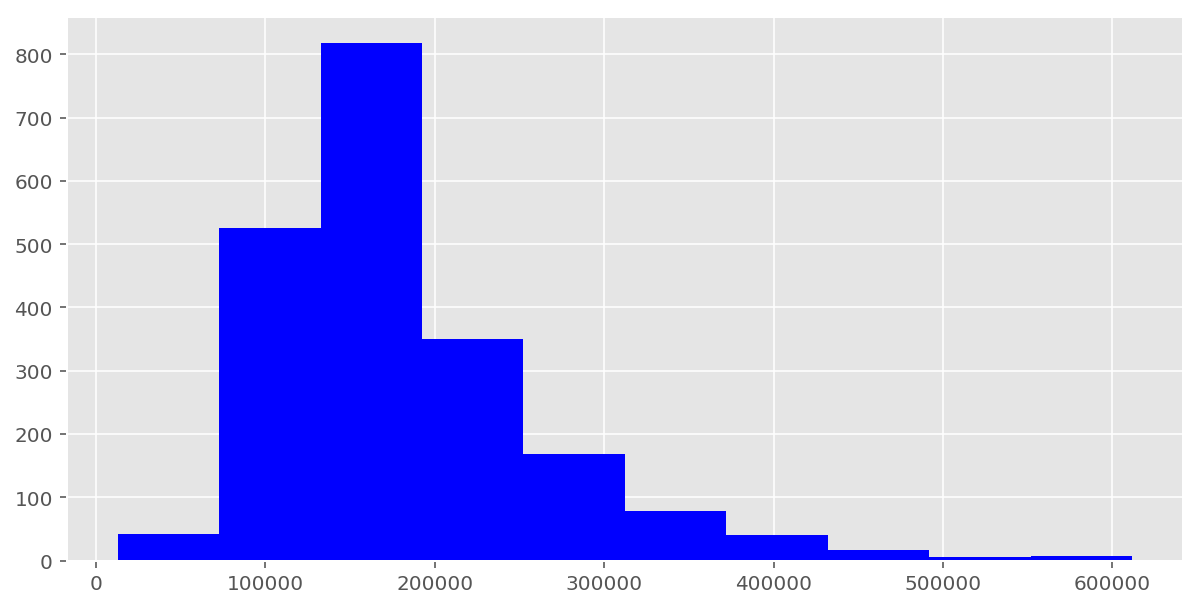

In [12]:
#checking the skew of our train df and plot it
print('Skew is', df_train.skew())
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,5)
plt.hist(df_train.saleprice, color = 'blue')
plt.show()

Skew is -0.14681576272177396


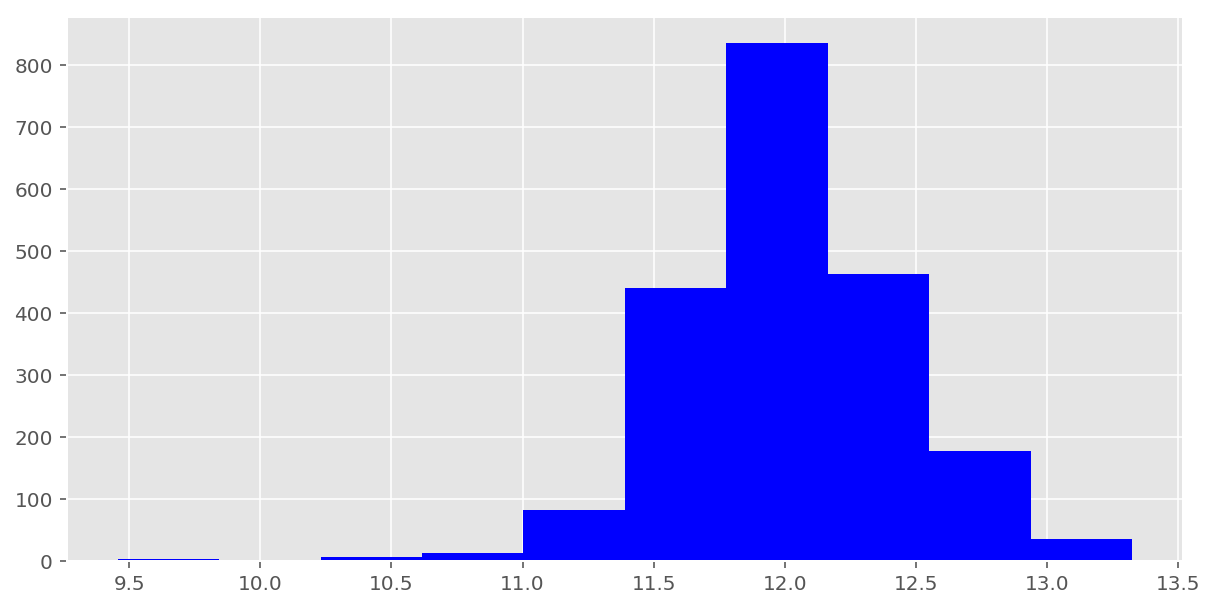

In [13]:
# using np.log to normalize the histogram and assign the result to target
target= np.log(df_train.saleprice)
print('Skew is', target.skew())
plt.hist(target, color='blue')
plt.show()

In [14]:
df_train.corr()['saleprice'].sort_values().tail(10)

full_bath         0.537969
year_remod/add    0.550370
year_built        0.571849
1st_flr_sf        0.618486
total_bsmt_sf     0.628925
garage_cars       0.648220
garage_area       0.650270
gr_liv_area       0.697038
overall_qual      0.800207
saleprice         1.000000
Name: saleprice, dtype: float64

In [15]:
#checking the coorelation of numaric values
df_train.corr()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,-0.045878,0.000723,0.008555,-0.038346,-0.022650,-0.008388,0.011719,-0.023881,-0.033385,0.014381,-0.059086,-0.042054,0.010605,-0.002400,-0.009092,-0.037560,-0.050730,-0.048666,-0.045201,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
pid,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,-0.086522,-0.013144,-0.111281,-0.203795,-0.145862,-0.005598,0.072268,-0.112936,-0.030554,-0.001946,-0.179370,-0.163975,0.009122,0.068416,-0.084999,-0.120710,-0.251257,-0.228368,-0.200891,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
ms_subclass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,-0.060854,-0.068265,-0.139911,-0.226038,-0.246212,0.305771,0.031091,0.068210,0.025055,-0.017249,0.142087,0.179404,-0.003516,0.252111,0.034490,-0.055118,0.084954,-0.049148,-0.108228,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
lot_frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,0.214178,0.036740,0.127605,0.356584,0.463900,0.013700,-0.000300,0.383856,0.111441,-0.030858,0.152812,0.035842,0.220414,0.015856,0.362704,0.253456,0.067865,0.297143,0.358457,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
lot_area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,0.215430,0.041717,0.041184,0.277175,0.381593,0.029398,0.001273,0.327427,0.116128,0.029980,0.125601,0.049995,0.139060,-0.013484,0.238724,0.289467,0.004882,0.214954,0.263296,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
overall_qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,0.278742,-0.028199,0.275773,0.548742,0.477136,0.228152,-0.052338,0.566701,0.175171,-0.047318,0.515080,0.274859,0.053373,-0.170964,0.382025,0.388920,0.574553,0.587423,0.563814,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
overall_cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,-0.045768,0.047810,-0.130521,-0.158643,-0.150938,0.010912,0.004753,-0.109804,-0.039113,0.100324,-0.219189,-0.093266,-0.009908,-0.095725,-0.093576,-0.006463,-0.331765,-0.168513,-0.137917,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
year_built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,0.275440,-0.021031,0.136662,0.410254,0.323315,0.022313,-0.159403,0.258838,0.215200,-0.031464,0.480169,0.283207,-0.042149,-0.127162,0.137783,0.168848,0.825316,0.542544,0.487177,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
year_remod/add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,0.166680,-0.057163,0.160066,0.308545,0.244190,0.159605,-0.066577,0.322407,0.153507,-0.037923,0.471555,0.224106,-0.019748,-0.135926,0.202397,0.138858,0.674024,0.441796,0.398999,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
mas_vnr_area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,0.321807,-0.016756,0.085853,0.4085

In [16]:
#pringting heatmap for the whole data fram which is not useful
#sns.heatmap(df_train.corr());

## Feature Engineering

### 1 garage_area

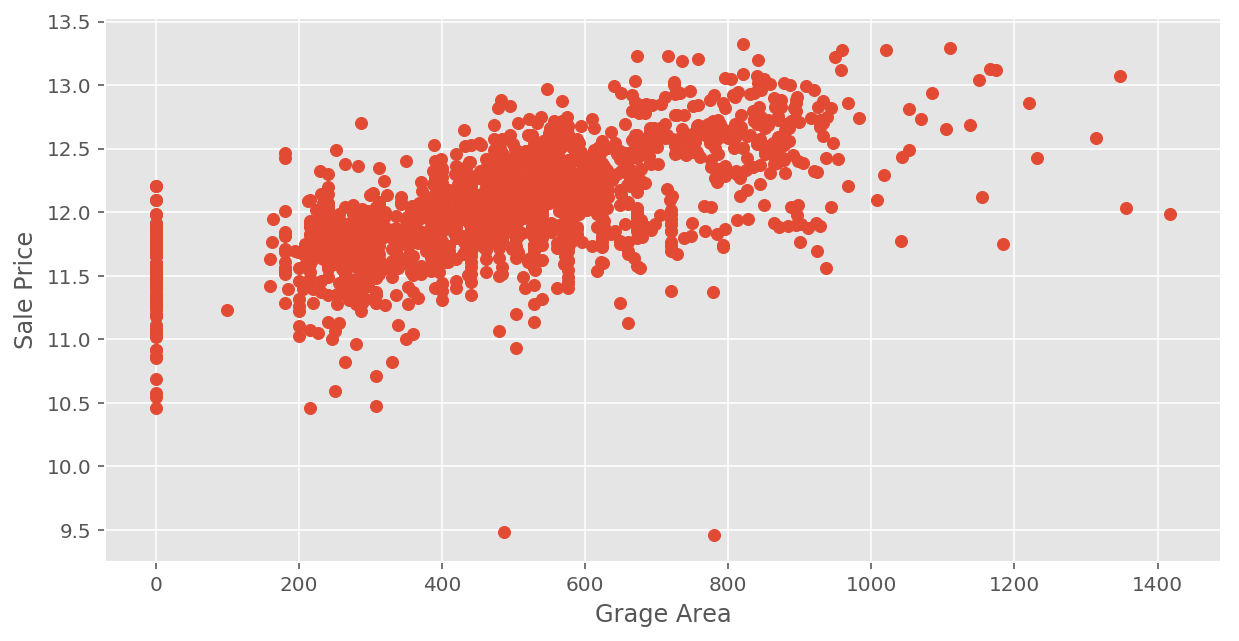

In [17]:
#ploting saleprice and grage area
plt.figure(figsize=[10,5],)
plt.scatter(x=df_train['garage_area'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Grage Area');

In [18]:
#Checking isnull values
df_train['garage_area'].isnull().value_counts()

False    2050
True        1
Name: garage_area, dtype: int64

In [19]:
#removing the NaN value from garage_area
df_train['garage_area']=df_train['garage_area'].fillna(0)
df_test['garage_area']=df_test['garage_area'].fillna(0)

In [20]:
#Checking how many 0 values we have in garage
(df_train['garage_area']==0).value_counts()

False    1937
True      114
Name: garage_area, dtype: int64

In [21]:
#Checking the data types
type(target) , type(df_train)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [22]:
#df_train[df_train['garage_area']<1200]

In [23]:
# remove those far dots
#df_train=df_train[(df_train['garage_area']<1200) & (df_train['saleprice'] > 10)]

In [24]:
#checking data shape of df_train and target
df_train.garage_area.shape, target.shape

((2051,), (2051,))

In [25]:
df_train.shape, df_test.shape

((2051, 81), (879, 80))

In [26]:
#[target<1200]

### 2 total_bsmt_sf

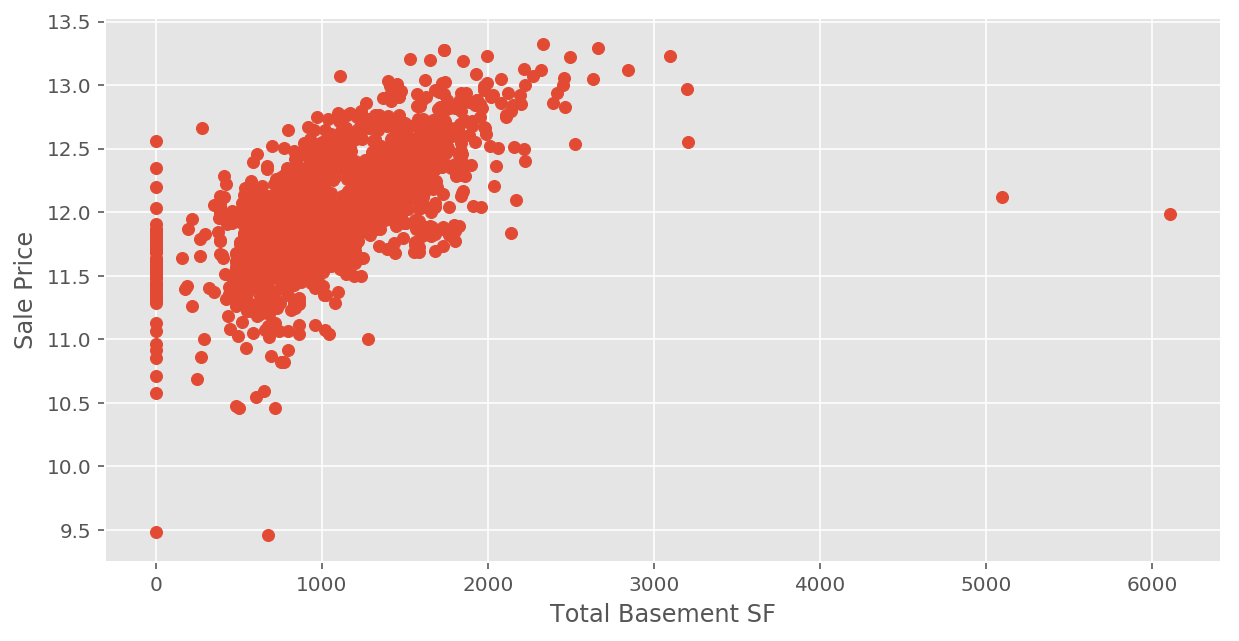

In [27]:
#ploting sales price and basement sf
plt.figure(figsize=[10,5])
plt.scatter(x=df_train['total_bsmt_sf'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Total Basement SF');

In [28]:
#checking missing values in total basement sf
df_train['total_bsmt_sf'].isnull().value_counts()

False    2050
True        1
Name: total_bsmt_sf, dtype: int64

In [29]:
#finding that missing value
df_train[df_train['total_bsmt_sf'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [30]:
#filling that missing value with 0 using finllna
df_train['total_bsmt_sf']=df_train['total_bsmt_sf'].fillna(0)
df_test['total_bsmt_sf']=df_test['total_bsmt_sf'].fillna(0)

In [31]:
#checking data make sure we dont have the missing value anymore
df_train['total_bsmt_sf'].isnull().value_counts()

False    2051
Name: total_bsmt_sf, dtype: int64

### 3 street_type

In [32]:
#checking street types
df_train['street'].value_counts()

Pave    2044
Grvl       7
Name: street, dtype: int64

In [33]:
#using dummies changing type of streets to 0s and 1s  and adding it to a new column
df_train['street_type']=pd.get_dummies(df_train.street, drop_first=True)
df_test['street_type']=pd.get_dummies(df_test.street, drop_first=True)

In [34]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,street_type
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,1


In [35]:
#checking the result
df_train.street_type.value_counts()

1    2044
0       7
Name: street_type, dtype: int64

### 4 exter_qual	

In [36]:
#checking the head
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,street_type
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,1


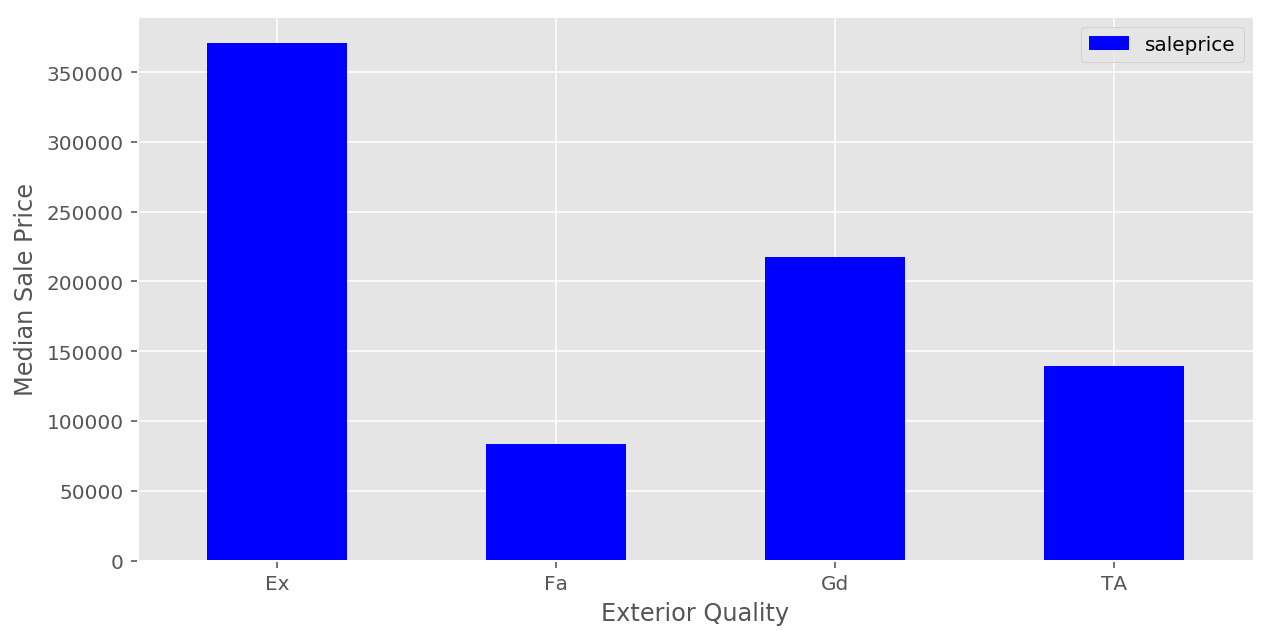

In [37]:
#bar ploting the exterior quality
exterior_quality=df_train.pivot_table(index='exter_qual', values= 'saleprice',aggfunc=np.median)
exterior_quality.plot(kind='bar', color= 'blue')
plt.xlabel('Exterior Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show();


In [38]:
#def encode(x): return 1 if x == 'EX' else 0
#df_train['exterior_e_q']= df_train.exter_qual.apply(encode)
#df_test['exterior_e_q']= df_test.exter_qual.apply(encode)

In [39]:
#exterior_quali

In [40]:
#df_test.head

### 4 garage_finish

In [41]:
df_train['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

### Pre- modeling checking 

In [42]:
df_train.shape, target.shape

((2051, 82), (2051,))

In [43]:
df_train.shape, df_test.shape

((2051, 82), (879, 81))

In [44]:
df_train.head(1)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,street_type
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,1


## Modeling

In [45]:
#assigning geatures and x and y train
features = ['garage_area','total_bsmt_sf','bedroom_abvgr', 'street_type','overall_qual',
            'gr_liv_area','full_bath','year_remod/add']
X= df_train[features]
y=df_train['saleprice']

In [46]:
#ss=StandardScaler()

In [47]:
#X_scaled = ss.fit_transform(X)
#pd.DataFrame(X_scaled, columns=features).head()

In [48]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
#linear regression
lr = LinearRegression()

In [50]:
#fit train and test to linear regression model 
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
#printing the score
lr.score(X_train, y_train)

0.770309454666467

In [52]:
#cross_val_score(lr, X_train, y).mean

In [53]:
#assigning the result to predection
prediction= lr.predict(X_train)

In [54]:
#checkng the predection
prediction

array([193172.50943699, 236467.36607059, 141438.81191963, ...,
       175314.03603335, 125797.93413448, 223280.46238779])

### Lr

In [55]:
#chicking linear regression on train and test
print (lr.score(X_train, y_train))
print (lr.score(X_test, y_test))

0.770309454666467
0.8356774987324379


In [56]:
#X_train.head()

In [57]:
#df_test[features].head()

In [58]:
#printing the shape of train data to see if its the same as test
X_train.shape

(1538, 8)

In [59]:
#printing the shape of test data to see if its the same as train
df_test[features].shape

(879, 8)

In [60]:
#assign test results to preds
preds = lr.predict(df_test[features])

In [61]:
#save the results to a csv file as submission 
submit= pd.read_csv('./datasets/test.csv',index_col='Id') #create a data frame of only Id from test file
submit ['saleprice']= preds #assign and add predections to the new dataframe 
submit=submit[['saleprice']]
submit.to_csv('submission.csv') #saving the csv file as submission to the folder

In [62]:
#checking the head of submission df
submit.head()

,saleprice
Id,
2658,177004.211123
2718,191657.714105
2414,195647.521475
1989,142690.163677
625,174726.784949


### Ridge

In [63]:
# checking the result with ridge 
ridge = RidgeCV()
ridge.fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7703015097069115
0.836030214412288


In [64]:
#submit2= pd.read_csv('./datasets/test.csv', index_col='Id')
#submit[]

### Lasso

In [65]:
#checking the result with lasso 
lasso = LassoCV()
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7038724227616675
0.777699108583134


/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [66]:
#lasso.alpha_